In [1]:
# Import required libraries for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit

In [2]:
# Read dataset using pandas
data_url = 'https://raw.githubusercontent.com/faadeola/us-airline-traffic-analysis/main/air_traffic_data.csv'
air_traffic = pd.read_csv(data_url)

# Display first 10 row of the data
air_traffic.head(10)

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07
5,2003,6,"52,209,516","5,411,504","57,621,020","798,351","58,225","856,576","44,492,972","13,918,185","58,411,157","56,555,517","17,191,579","73,747,096",78.67,80.96,79.20
6,2003,7,"55,810,773","6,191,120","62,001,893","831,619","62,957","894,576","48,321,924","15,516,794","63,838,718","59,617,048","18,701,759","78,318,807",81.05,82.97,81.51
7,2003,8,"53,920,973","6,272,332","60,193,305","830,737","63,760","894,497","46,982,527","15,906,430","62,888,957","59,634,190","19,144,885","78,779,075",78.78,83.08,79.83
8,2003,9,"44,213,408","4,824,596","49,038,004","781,804","54,017","835,821","36,819,820","13,570,889","50,390,709","54,973,852","17,820,478","72,794,329",66.98,76.15,69.22
9,2003,10,"49,944,931","4,920,822","54,865,753","818,308","54,272","872,580","41,480,412","13,447,446","54,927,858","58,001,020","17,694,417","75,695,437",71.52,76.00,72.56


In [3]:
# Rename columns for clarity
air_traffic = air_traffic.rename(columns={
                                  'Pax':'Total_pax',
                                  'Dom_Flt':'Dom_flight',
                                  'Int_Flt':'Int_flight',
                                  'Flt':'Total_flight',
                                  'RPM': 'Revenue_per_miles',
                                  'ASM':'Available_seat_per_miles',
                                  'Dom_LF':'Dom_load_factor',
                                  'Int_LF':'Int_load_factor',
                                  'LF':'Total_load_factor'
                                })

# Set specific column to appropriate data type
col_to_convert = ['Dom_Pax', 'Int_Pax', 'Total_pax', 'Dom_flight', 'Int_flight', 'Total_flight',
                   'Dom_RPM', 'Int_RPM', 'Revenue_per_miles', 'Available_seat_per_miles', 'Dom_ASM', 'Int_ASM']

for col in col_to_convert:
    if col in air_traffic.columns:
        air_traffic[col] = air_traffic[col].str.replace(',','').astype(int)

In [4]:
''' 
Display information about the data:
columns, count of cell that are not empty (non-null) and the data type of each column
'''
print(air_traffic.info(), end='\n\n')

# View basic statistics about the dataset
print(air_traffic.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      249 non-null    int64  
 1   Month                     249 non-null    int64  
 2   Dom_Pax                   249 non-null    int64  
 3   Int_Pax                   249 non-null    int64  
 4   Total_pax                 249 non-null    int64  
 5   Dom_flight                249 non-null    int64  
 6   Int_flight                249 non-null    int64  
 7   Total_flight              249 non-null    int64  
 8   Dom_RPM                   249 non-null    int64  
 9   Int_RPM                   249 non-null    int64  
 10  Revenue_per_miles         249 non-null    int64  
 11  Dom_ASM                   249 non-null    int64  
 12  Int_ASM                   249 non-null    int64  
 13  Available_seat_per_miles  249 non-null    int64  
 14  Dom_load_f

In [5]:
# Remove rows with year 2023 value since it does not complete 12 months of data for the year
air_traffic = air_traffic[air_traffic['Year'] != 2023]
air_traffic.tail(10)

,Year,Month,Dom_Pax,Int_Pax,Total_pax,Dom_flight,Int_flight,Total_flight,Dom_RPM,Int_RPM,Revenue_per_miles,Dom_ASM,Int_ASM,Available_seat_per_miles,Dom_load_factor,Int_load_factor,Total_load_factor
230,2022,3,64617029,7872874,72489903,629670,62309,691979,61674886,16212974,77887859,71989974,22030861,94020835,85.67,73.59,82.84
231,2022,4,63518318,8398121,71916439,616135,63462,679597,60270759,18529341,78800100,68700144,23743871,92444015,87.73,78.04,85.24
232,2022,5,66961805,8815732,75777537,644024,65674,709698,62706846,20788694,83495540,70974153,26263661,97237814,88.35,79.15,85.87
233,2022,6,67368670,10023468,77392138,640218,67900,708118,63343854,24276114,87619968,70415408,27883747,98299154,89.96,87.06,89.14
234,2022,7,69432042,10943155,80375197,667889,71229,739118,65633746,26440533,92074279,74959377,29660776,104620153,87.56,89.14,88.01
235,2022,8,66520067,10115929,76635996,657576,68544,726120,62934639,24979841,87914480,73836109,29246437,103082546,85.24,85.41,85.29
236,2022,9,63139630,8287331,71426961,622299,57089,679388,58463970,21860088,80324058,68920247,26063870,94984116,84.83,83.87,84.57
237,2022,10,67935181,8414518,76349699,639282,57765,697047,62656863,21457977,84114840,72264313,25834667,98098981,86.71,83.06,85.74
238,2022,11,63680032,8216914,71896946,605075,59745,664820,59194297,19692450,78886747,70250775,24616723,94867498,84.26,80.00,83.15
239,2022,12,62482296,9405384,71887680,596437,67511,663948,59724506,22595815,82320321,71301260,27343999,98645259,83.76,82.64,83.45


In [18]:
def plot_hist(col):
    '''
    Create an histogram plot for any specified column
    '''
    
    fig, ax = plt.subplots(dpi=144)

    # The kde (kernel density estimate) argument set to True shows shape of the distribution on the plot
    sns.histplot(col, bins=15, color='blue', edgecolor='black', kde=True)
    
    # Draw a vertical line on the mean and median point of the specified column
    plt.axvline(col.mean(), color='red', lw=1.5, ls='--', label= f'Mean: {col.mean():.2f}')
    plt.axvline(col.median(), color='orange', lw=1, ls='-', label= f'Median: {col.median():.2f}')
    
    # Annotate skewness and kurtosis value of distribution
    plt.annotate(f'Skewness of Distribution: {ss.skew(col):.2f}', 
                 xy=(col.min()-2, (col.max()-col.min()+col.min()))
                )
    
    # Set plot attributes (label, title and ticks)
    plt.xlabel(col.name, labelpad=10, fontsize=10)
    plt.ylabel('Frequency of Occurrence', labelpad=10, fontsize=10)
    plt.title(f'Distribution of {col.name}', fontsize= 12, fontweight='bold', pad=14)
    ax.tick_params(axis='both', labelsize=8)
    plt.legend(loc='upper left')
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    return

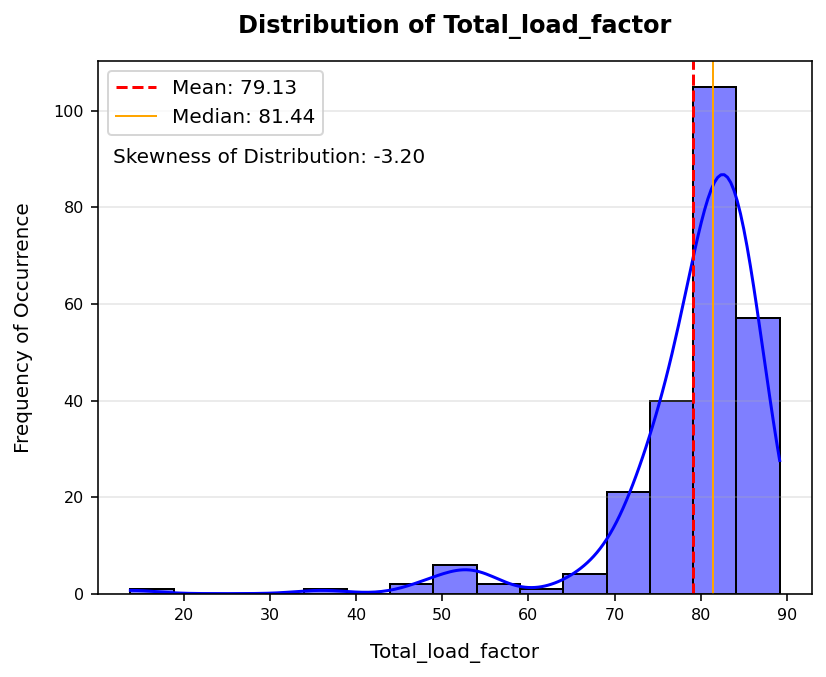

In [19]:
plot_hist(air_traffic['Total_load_factor'])